In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import glob
from radioReduction import *
from astropy.stats import LombScargle
from scipy import optimize
from scipy.interpolate import make_interp_spline, BSpline




In [9]:
mjd = []
flux = []
err = []

files = glob.glob('1314/daily/dataTables/*-LLRR.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

dt = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
dt = dt.sort_values('mjd')

In [3]:
dt

,mjd,re,ure
2,57589.079033,1.021043,0.006581
0,57590.023902,1.095496,0.006749
1,57591.022232,1.102065,0.007034
6,57591.992823,1.268339,0.006934
4,57592.993537,1.028409,0.007516
5,57594.032177,0.998077,0.006661
3,57595.031712,0.933818,0.008521


In [4]:
dt.to_csv('1314/daily/daily_1314.csv')

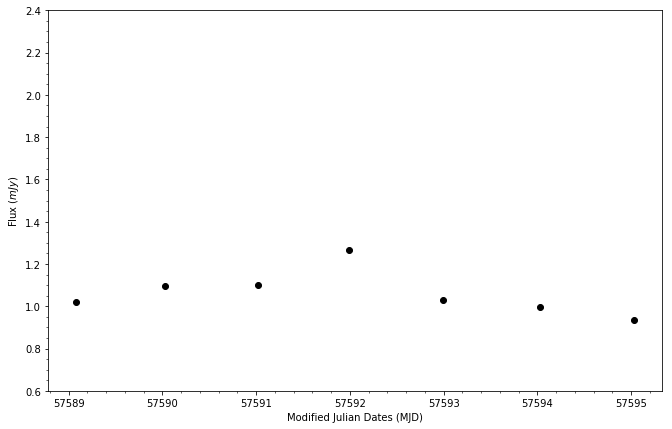

In [15]:
plt.figure(figsize=(11,7))
plt.errorbar(dt['mjd'],dt['re'],yerr=dt['ure'],color='k',fmt='o')
plt.ylim(.6,1.6)
plt.xlabel('Modified Julian Dates (MJD)')
plt.ylabel('Flux ($mJy$)')
plt.minorticks_on()
plt.ylim(0.6,2.4)
plt.savefig('plots/1314Daily.png')
plt.show()


In [14]:
'''
Fitting a mean value and calculating a reduced chi^2
'''

reduced_chi = np.sum(np.square((dt['re']-dt['re'].mean()))/(dt['ure'])**2)/(dt.shape[0]-1)

print(reduced_chi)

219.35249038966506


/home/russell/projects/radio_project/radioReduction.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['secs'] = data['dtmin']*60


1
2
3
4
5
6
7
Stats for 10 
             mjd  reduced_chi       rms
0  57589.079075     1.006686  0.006560
1  57590.023943     1.353123  0.007779
2  57591.022273     1.640632  0.008926
3  57591.992823     1.633694  0.008848
4  57592.993537     1.339912  0.008701
5  57594.032219     1.059642  0.006795
6  57595.031712     1.635937  0.011389


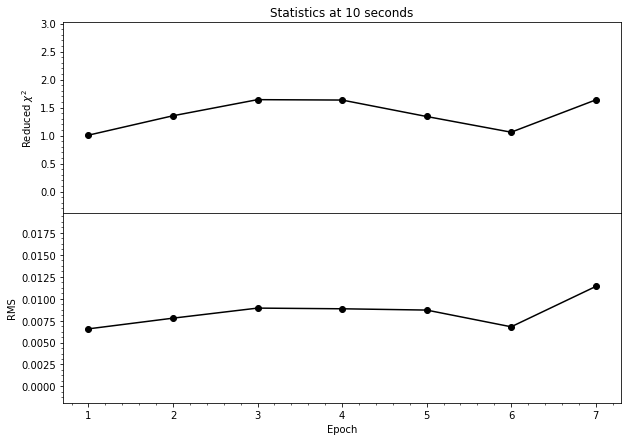

1
2
3
4
5
6
7
Stats for 15 
             mjd  reduced_chi       rms
0  57589.079075     1.089785  0.006824
1  57590.023902     1.656030  0.008617
2  57591.022232     1.952509  0.009684
3  57591.992906     2.322924  0.010559
4  57592.993619     1.462014  0.009052
5  57594.032177     1.176258  0.007161
6  57595.031795     2.043830  0.012741


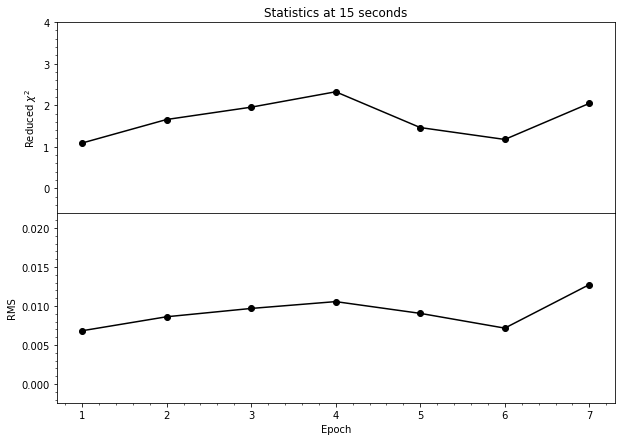

1
2
3
4
5
6
7
Stats for 30 
             mjd  reduced_chi       rms
0  57589.079074     1.127552  0.006895
1  57590.024019     1.509533  0.008130
2  57591.022348     2.720656  0.011075
3  57591.992904     3.703476  0.013273
4  57592.993617     1.799821  0.009966
5  57594.032295     1.635805  0.008375
6  57595.031793     2.645928  0.014503


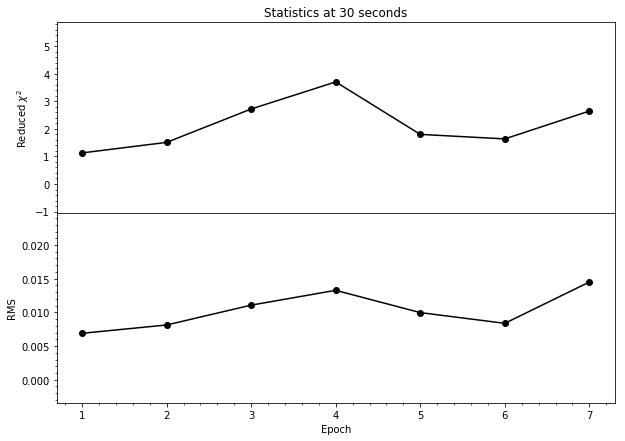

1
2
3
4
5
6
7
Stats for 45 
             mjd  reduced_chi       rms
0  57589.079235     1.188181  0.006969
1  57590.023902     1.560394  0.008233
2  57591.022232     3.396472  0.012498
3  57591.993035     4.595943  0.014518
4  57592.993746     2.271051  0.011221
5  57594.032177     1.850655  0.008839
6  57595.031923     3.161513  0.015705


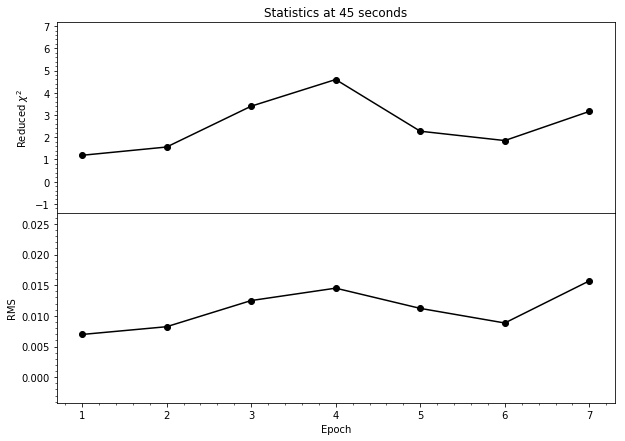

1
2
3
4
5
6
7
Stats for 60 
             mjd  reduced_chi       rms
0  57589.079200     0.761554  0.005597
1  57590.024059     2.144636  0.009561
2  57591.022388     4.387285  0.013933
3  57591.992987     6.265916  0.016889
4  57592.993699     2.585610  0.011967
5  57594.032334     1.930849  0.008924
6  57595.031876     2.194566  0.012416


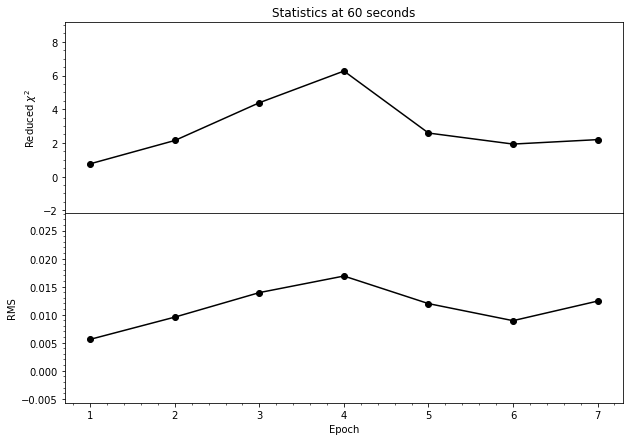

1
2
3
4
5
6
7
Stats for 90 
             mjd  reduced_chi       rms
0  57589.079126     1.050227  0.006359
1  57590.023940     2.317297  0.009734
2  57591.022271     6.443049  0.016677
3  57591.992893     7.060376  0.017576
4  57592.993606     3.764794  0.014166
5  57594.032216     2.778266  0.010532
6  57595.031782     3.872002  0.016404


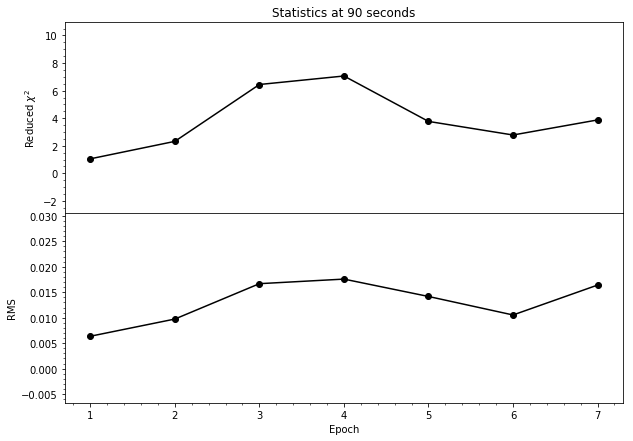

1
2
3
4
5
6
7
Stats for 180 
             mjd  reduced_chi       rms
0  57589.079086     0.373392  0.003586
1  57590.023937     4.102303  0.012254
2  57591.022267    10.612936  0.020319
3  57591.992876    12.266097  0.021770
4  57592.993589     5.188381  0.015664
5  57594.032212     5.043028  0.013350
6  57595.031765     2.780026  0.012279


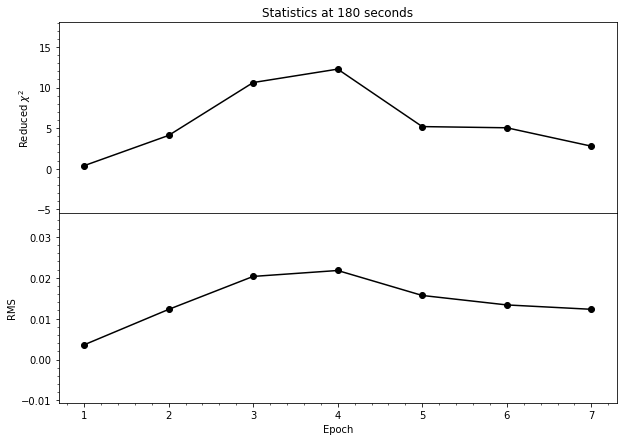

1
2
3
4
5
6
7
Stats for 210 
             mjd  reduced_chi       rms
0  57589.079066     1.253075  0.006367
1  57590.023935     5.121991  0.013172
2  57591.022265    14.353822  0.022821
3  57591.992823    16.518813  0.024479
4  57592.993537     4.703033  0.014322
5  57594.032210     4.451157  0.012131
6  57595.031712     6.247180  0.018349


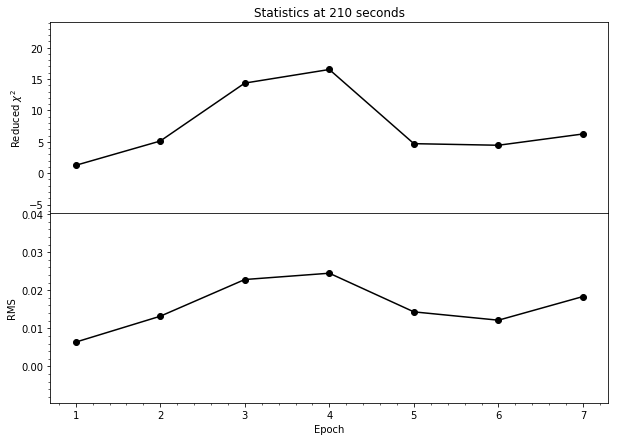

In [7]:
dt = sorted(glob.glob('1314/daily/dataTables/*-LLRR.dat'))
dtLow = sorted(glob.glob('1314/daily/dataTables/*-5GHz.dat'))
dtHigh = sorted(glob.glob('1314/daily/dataTables/*-7GHz.dat'))

x = []
y = []
z = []



for i in range(len(dt)):
    x.append(pd.read_table(dt[i]))
    y.append(pd.read_table(dtLow[i]))
    z.append(pd.read_table(dtHigh[i]))
    
binningTime = [10,15,30,45,60,90,180,210]

for s in binningTime:
    mjd = []
    rms = []
    reduced_chi = []
    q = 0 # Will be used to grab the epoch
    for a in range(len(x)):
        i = x[a][x[a]['nsamp']>1500]
        j = y[a][y[a]['nsamp']>1000]
        k = z[a][z[a]['nsamp']>1000]
        
        # Binning the datatable
        day = int(i['mjd'].mean())
        if (day == 57682 or day == 57704 or day == 57771):
            print(day)
            ii = binning(i,s,binning=2)
            jj = binning(j,s,binning=2)
            kk = binning(k,s,binning=2)
        else:
            ii = binning(i,s)
            jj = binning(j,s)
            kk = binning(k,s)
            
        # Calculating RMS and Reduced Chi
        mjd.append(ii['mjd'].mean())
        rms.append(np.sqrt(np.sum((ii['re']-ii['re'].mean())**2))/ii.shape[0])
        reduced_chi.append(np.sum(np.square((ii['re']-ii['re'].mean())/ii['ure']))/(ii.shape[0]-1))
        
        # Grabbing Epoch Number
        epochNumber = dt[q]
        epochNumber = epochNumber.replace('1314/daily/dataTables/2M1314de','')
        epochNumber = epochNumber.replace('-LLRR.dat','')
        print(epochNumber)
    
        # Making a plot of each epoch at the binning time
        plt.figure(figsize=(10,8))
        plt.errorbar(ii['dtmin'],ii['re'],yerr=ii['ure'],linestyle='None',fmt='o',color='k')
        plt.xlabel('Time (minutes)')
        plt.ylabel('Flux ($mJy$)')
        plt.minorticks_on()
        plt.title('Epoch %s binned at %s seconds'%(epochNumber,s))
        plt.ylim(0.6,2.0)
        plt.savefig('1314/plots/daily/%ssecs/e%s_%s.png'%(s,epochNumber,s),bbox_inches='tight')
        plt.close()
        
        # Making a plot of the spectral energy distribution
        plt.figure(figsize=(10,8))
        plt.errorbar(jj['dtmin'],jj['re'],yerr=jj['ure'],linestyle='None',fmt='o',color='darkgreen',label='5 GHz')
        plt.errorbar(kk['dtmin'],kk['re'],yerr=kk['ure'],linestyle='None',fmt='o',color='darkorange',label='7 GHz')
        plt.xlabel('Time (minutes)')
        plt.ylabel('Flux ($mJy$)')
        plt.minorticks_on()
        plt.title('Epoch %s Spectral Energy Distribution binned at %s seconds'%(epochNumber,s))
        plt.ylim(kk['re'].min()-0.2*kk['re'].min(),ii['re'].max()+0.5*ii['re'].max())
        plt.savefig('1314/plots/daily/%ssecs/e%sSED_%s.png'%(s,epochNumber,s),bbox_inches='tight')
        plt.close()

        
        
        q = q + 1
    # Putting everything into a pandas table    
    mjd = np.array(mjd)
    rms = np.array(rms)
    reduced_chi = np.array(reduced_chi)

    stats = pd.DataFrame(data={'mjd':mjd,'reduced_chi':reduced_chi,'rms':rms})
    stats = stats.sort_values('mjd')
    stats = stats.reset_index(drop=True)
    
    # Plotting the statistics
    fig, ax = plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(10,7),gridspec_kw = {'hspace':0})
    ax[0].plot(stats.index,stats['reduced_chi'],color='k',marker='o')
    ax[0].set_ylabel('Reduced $\chi^2$')
    ax[0].set_title('Statistics at %s seconds'%s)
    ax[0].set_ylim(np.amin(stats['reduced_chi'])-np.mean(stats['reduced_chi']),np.amax(stats['reduced_chi'])+np.mean(stats['reduced_chi']))
    ax[0].minorticks_on()
    
    ax[1].plot(stats.index,stats['rms'],color='k',marker='o')
    ax[1].set_ylabel('RMS')
    ax[1].set_ylim(np.amin(stats['rms'])-np.mean(stats['rms']),np.amax(stats['rms'])+np.mean(stats['rms']))
    ax[1].minorticks_on()
    
    print('Stats for %s \n'%s,stats)
    pos = np.arange(7)
    labels = pos + 1

    plt.xticks(pos,labels)
    plt.xlabel('Epoch')
    plt.savefig('1314/plots/daily/stats_%s.png'%s)
    plt.show()
    plt.close()
    
    stats.to_csv('1314/plots/daily/%sseconds_Stats.csv'%s,sep=' ',index=False)



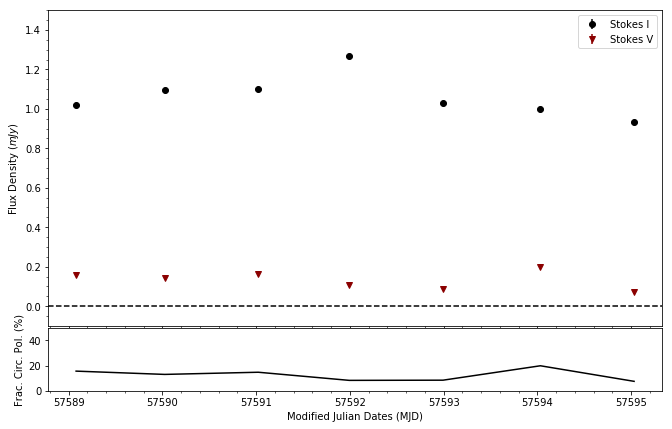

12.470462306557

In [49]:
# The 7 GHz band
mjd = []
flux = []
err = []

files = glob.glob('1314/daily/dataTables/*-LL.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

ll = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
ll = ll.sort_values(by=['mjd']).reset_index()

# The 5 GHz Band
mjd = []
flux = []
err = []

files = glob.glob('1314/daily/dataTables/*-RR.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

rr = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
rr = rr.sort_values(by=['mjd']).reset_index()

stV = (rr['re']-ll['re'])*0.5
stI = (rr['re']+ll['re'])*0.5
stErr = np.sqrt(rr['ure']**2+ll['ure']**2)*.5


fig,ax = plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(11,7),gridspec_kw={'hspace':0.01,'height_ratios':[5,1]})
ax[0].errorbar(rr['mjd'],stI,yerr=stErr,fmt='o',color='black',label='Stokes I')
ax[0].errorbar(rr['mjd'],stV,yerr=stErr,fmt='v',color='darkred',label='Stokes V')
ax[0].set_ylabel('Flux Density ($mJy$)')
ax[0].legend(loc='best')
ax[0].axhline(y=0,color='k',linestyle='dashed')
ax[0].minorticks_on()
ax[0].set_ylim(-0.1,1.5)

ax[1].set_ylim(0,50)
ax[1].plot(rr['mjd'],(stV/stI)*100,color='k')
ax[1].set_ylabel('Frac. Circ. Pol. (%)')
plt.xlabel('Modified Julian Dates (MJD)')
plt.savefig('plots/1314Daily.png')
plt.show()

np.mean((stV/stI)*100)

In [52]:
print(stV,stErr)


0    0.159194
1    0.142212
2    0.161760
3    0.104872
4    0.086661
5    0.197986
6    0.069931
Name: re, dtype: float64 0    0.006579
1    0.006747
2    0.007032
3    0.006932
4    0.007515
5    0.006658
6    0.008519
Name: ure, dtype: float64


In [26]:
'''
Chi2 calculation
'''

chi2 = np.sum((stI-np.mean(stI))**2/(stErr**2))/(len(stI)-1)
print(chi2)

chi2 = np.sum((stV-np.mean(stV))**2/(stErr**2))/(len(stV)-1)
print(chi2)
print(np.mean(stV))



219.10500031828641
40.10013116047795
0.13180233488537726


1.2689178622051873


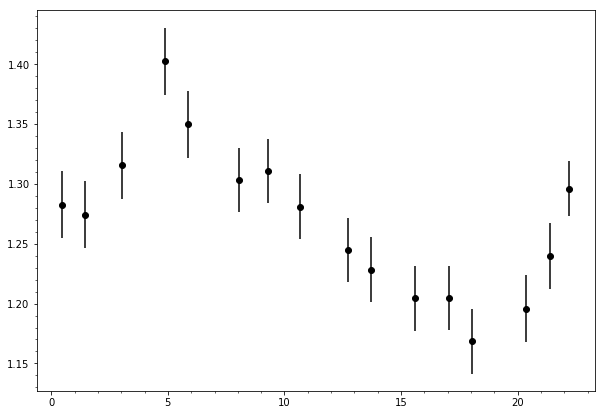

In [17]:
e4 = pd.read_table('1314/daily/dataTables/2M1314de4-LLRR.dat')

e4 = e4[e4['nsamp']>5000]

e4 = binning(e4,60)

print(e4['re'].mean())

plt.figure(figsize=(10,7))
plt.errorbar(e4['dtmin'],e4['re'],yerr=e4['ure'],color='black',linestyle='none',marker='o')
plt.minorticks_on()
plt.show()

#### 

In [10]:
mjd = []
flux = []
err = []

files = glob.glob('1314/daily/dataTables/*-7GHz.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

high = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
high = high.sort_values('mjd')

In [11]:
high

,mjd,re,ure
2,57589.079052,0.922110,0.010146
5,57590.023889,0.002955,0.009765
1,57591.022223,-0.006128,0.011525
0,57591.992813,-0.000469,0.010769
3,57592.993497,-0.007555,0.017084
4,57594.032138,0.002841,0.010139
6,57595.031702,-0.003984,0.015185


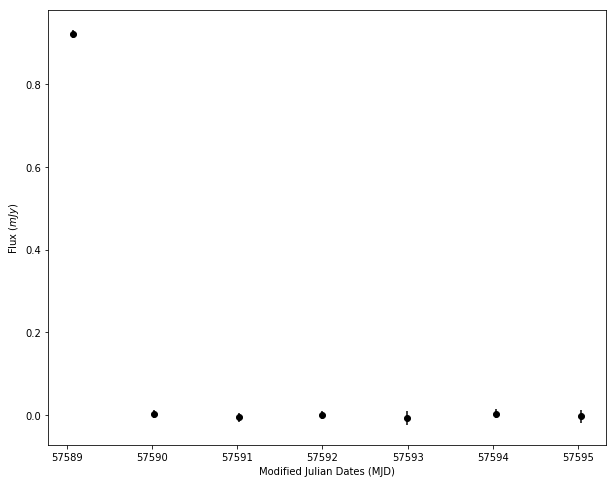

In [12]:
plt.figure(figsize=(10,8))
plt.errorbar(high['mjd'],high['re'],yerr=high['ure'],fmt='o',color='k',)
plt.xlabel('Modified Julian Dates (MJD)')
plt.ylabel('Flux ($mJy$)')
plt.savefig('plots/1314_daily_SED.png')
plt.show()

In [13]:
mjd = []
flux = []
err = []

files = glob.glob('1314/daily/dataTables/*-5GHz.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

low = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
low = low.sort_values('mjd')

mjd = []
flux = []
err = []


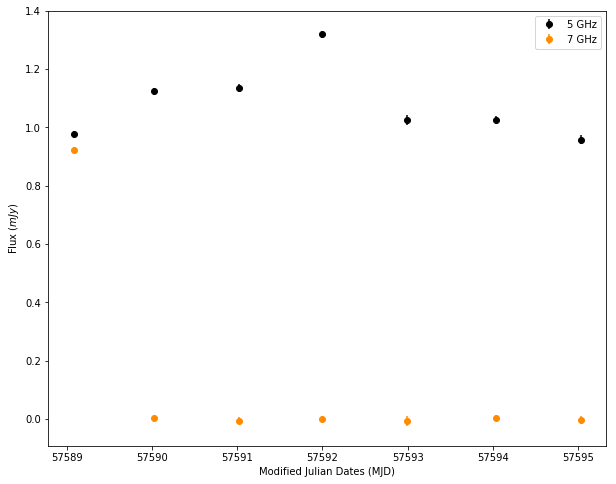

In [14]:
plt.figure(figsize=(10,8))
plt.errorbar(low['mjd'],low['re'],yerr=low['ure'],fmt='o',color='k',label='5 GHz')
plt.errorbar(high['mjd'],high['re'],yerr=high['ure'],fmt='o',color='darkorange',label='7 GHz')
plt.xlabel('Modified Julian Dates (MJD)')
plt.legend(loc='best')
plt.ylabel('Flux ($mJy$)')
plt.savefig('plots/1314DailySed.png')
plt.show()

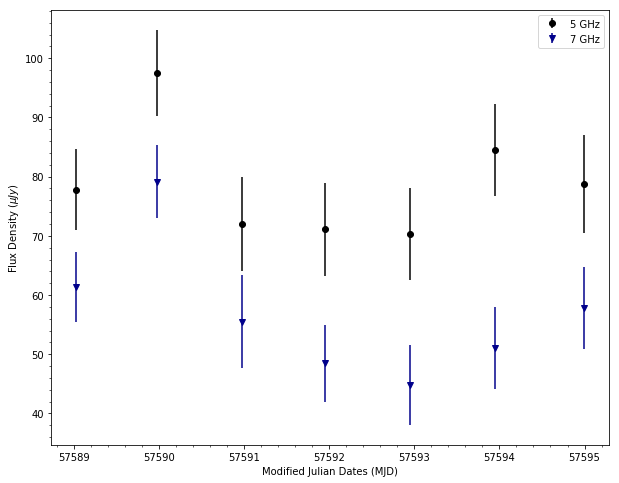

In [12]:
# The 7 GHz band
mjd = []
flux = []
err = []

files = glob.glob('1315/daily/*-7GHz.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

high = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
high = high.sort_values(by=['mjd'])

# The 5 GHz Band
mjd = []
flux = []
err = []

files = glob.glob('1315/daily/*-5GHz.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

low = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
low = low.sort_values(by=['mjd'])

plt.figure(figsize=(10,8))
plt.errorbar(low['mjd'],low['re'],yerr=low['ure'],fmt='o',color='black',label='5 GHz')
plt.errorbar(high['mjd'],high['re'],yerr=high['ure'],fmt='v',color='darkblue',label='7 GHz')
plt.xlabel('Modified Julian Dates (MJD)')
plt.ylabel('Flux Density ($\mu Jy$)')
plt.legend(loc='best')
plt.minorticks_on()
#plt.plots('plots/1315Daily_sed.png')
plt.show()

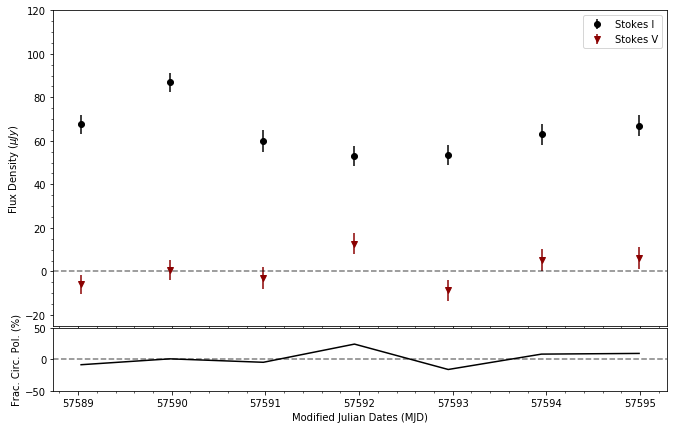

In [40]:
# The 7 GHz band
mjd = []
flux = []
err = []

files = glob.glob('1315/daily/*-LL.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

ll = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
ll = ll.sort_values(by=['mjd']).reset_index()

# The 5 GHz Band
mjd = []
flux = []
err = []

files = glob.glob('1315/daily/*-RR.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

rr = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
rr = rr.sort_values(by=['mjd']).reset_index()

stV = (rr['re']-ll['re'])*0.5
stI = (rr['re']+ll['re'])*0.5
stErr = np.sqrt(rr['ure']**2+ll['ure']**2)*.5


fig,ax = plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(11,7),gridspec_kw={'hspace':0.01,'height_ratios':[5,1]})
ax[0].errorbar(rr['mjd'],stI,yerr=stErr,fmt='o',color='black',label='Stokes I')
ax[0].errorbar(rr['mjd'],stV,yerr=stErr,fmt='v',color='darkred',label='Stokes V')
ax[0].set_ylabel('Flux Density ($\mu Jy$)')
ax[0].legend(loc='best')
ax[0].axhline(y=0,color='k',linestyle='dashed',alpha=0.5)
ax[0].minorticks_on()
ax[0].set_ylim(-25,120)

ax[1].set_ylim(-50,50)
ax[1].plot(rr['mjd'],(stV/stI)*100,color='k')
ax[1].axhline(y=0,color='k',linestyle='dashed',alpha=0.5)
ax[1].set_ylabel('Frac. Circ. Pol. (%)')
plt.xlabel('Modified Julian Dates (MJD)')
plt.savefig('plots/1315Daily.png')
plt.show()

In [42]:
'''
Reduced chi2 of flux measurements
'''

chi2 = np.sum((stI-np.mean(stI))**2/stErr**2)/(len(stI)-1)
print(chi2)

chi2 = np.sum((stV-np.mean(stV))**2/stErr**2)/(len(stV)-1)
print(chi2)

6.146710517727942
2.503808912437974


In [3]:
mjd = []
flux = []
err = []

files = glob.glob('1315/daily/dataTables/*-LLRR.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

dt = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
dt = dt.sort_values('mjd')
print(dt)

            mjd         re       ure
1  57589.032129  68.640423  4.341953
6  57589.980897  87.051961  4.534671
3  57590.978166  60.491693  5.122333
4  57591.951216  51.879143  4.754822
5  57592.952011  53.913983  4.815641
2  57593.948041  63.101036  5.011645
0  57594.990083  65.321263  4.862603


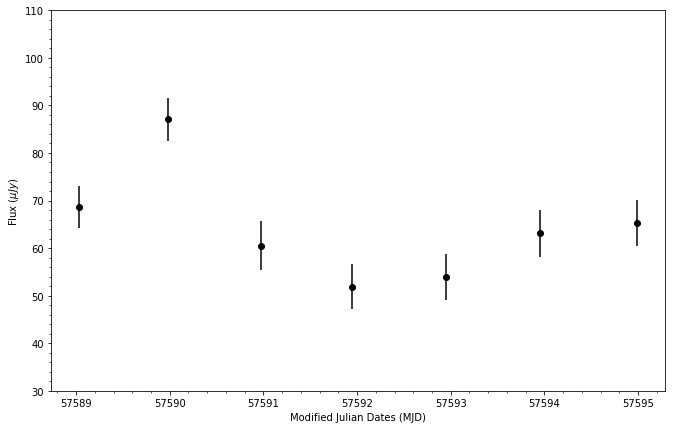

In [15]:
plt.figure(figsize=(11,7))
plt.errorbar(dt['mjd'],dt['re'],yerr=dt['ure'],color='k',fmt='o')
plt.ylim(30,110)
plt.xlabel('Modified Julian Dates (MJD)')
plt.ylabel('Flux ($\mu Jy$)')
plt.minorticks_on()
plt.savefig('plots/1315Daily.png')
plt.show()

In [16]:
'''
Fitting a mean value and calculating a reduced chi^2
'''

reduced_chi = np.sum(np.square((dt['re']-dt['re'].mean())/dt['ure']))/dt.shape[0]

print(reduced_chi)

5.469536963212979


In [17]:
avg = pd.read_table('1315/daily/dataTables/2M1315de2-LLRR.dat')
ll = pd.read_table('1315/daily/dataTables/2M1315de2-LL.dat')
rr = pd.read_table('1315/daily/dataTables/2M1315de2-RR.dat')

stI = (ll['re'].mean()+rr['re'].mean())*.5


print(avg['re'].mean(),ll['re'].mean(),rr['re'].mean(),stI)

87.63533392066233 84.78178060828984 90.381317455031 87.58154903166042


In [18]:
86.7/62.65

1.383878691141261

In [19]:
'''
Defining our model, likelihoood, and prior functions
'''
def linearModel(theta,x):
    '''
    Linear model fitting to the data
    '''
    m,b = theta
    y = m*x+b
    return y

def lnprior(theta):
    '''
    Uniform priors for m and b constrained by the data
    '''
    m,b = theta
    if -1 < m < 1 and 50 < b < 100:
        return 0.0
    return -np.inf

def lnlike(theta,x,y,yerr):
    '''
    Log of the likelihood function (chi^2)
    '''
    return -0.5*(np.sum((y-linearModel(theta,x))**2/yerr**2))

def lnprob(theta,x,y,err):
    '''
    Putting prior and likelihood together
    '''
    lnp = lnprior(theta)
    if not np.isfinite(lnp):
        return -np.inf
    return lnp + lnlike(theta,x,y,yerr)

In [20]:
# Putting data to variables
x = dt['mjd']
y = dt['re']
yerr = dt['ure']

In [21]:
# Optimizing the lnlikelihood
# Minimize to -log of the likelihood to maximize the likelihood
nll = lambda *args: -lnlike(*args)
x0 = [5,3]
linearResult = op.minimize(nll,x0,args=(x,y,yerr))
m_ml,b_ml = linearResult.x
print(m_ml,b_ml)


-0.027827902719934475 1667.1192020755507


In [24]:
e2 = pd.read_table('1315/daily/2M1315de2-LLRR.dat')

e2 = binning(e2,360)

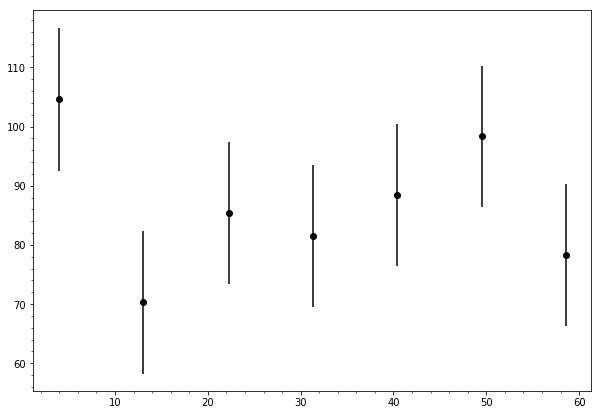

In [25]:
plt.figure(figsize=(10,7))
plt.errorbar(e2['dtmin'],e2['re'],yerr=e2['ure'],color='black',linestyle='none',marker='o')
plt.minorticks_on()
plt.show()

In [44]:
ll = pd.read_table('1315/daily/dataTables/2M1315de2-LL.dat')
rr = pd.read_table('1315/daily/dataTables/2M1315de2-RR.dat')

ll = binning(ll,150)
rr = binning(rr,150)


stI = (rr['re']+ll['re'])*.5
stV = (rr['re']-ll['re'])*.5
stErr = np.sqrt(rr['ure']**2+ll['ure']**2)*.5

frac = stV/stI
fracErr = np.abs(frac)*np.sqrt((stErr/stI)**2+(stErr/stV)**2)
time = rr['dtmin']

/home/russell/projects/radio_project/radioReduction.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['secs'] = data['dtmin']*60


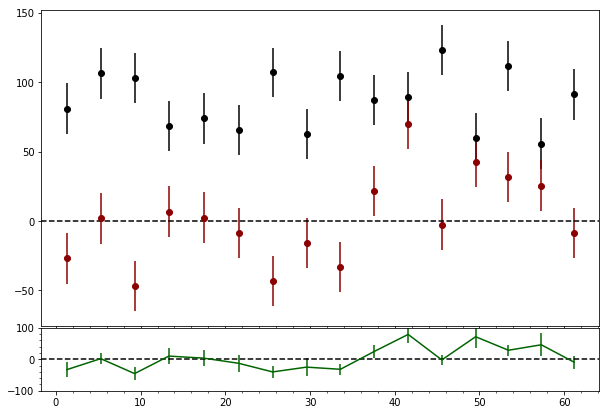

In [45]:
fig,ax=plt.subplots(nrows=2,ncols=1,sharex=True,gridspec_kw= {'hspace':.01,'height_ratios':[5,1]},figsize=(10,7))
ax[0].errorbar(time,stI,yerr=stErr,color='black',linestyle='none',marker='o')
ax[0].errorbar(time,stV,yerr=stErr,color='darkred',linestyle='none',marker='o')
ax[0].axhline(y=0,color='black',linestyle='dashed')
ax[1].errorbar(time,100*frac,yerr=100*fracErr,color='darkgreen')
ax[1].axhline(y=0,color='black',linestyle='dashed')
ax[1].set_ylim(-100,100)
plt.minorticks_on()
plt.show()

In [23]:
stI

-0.0      81.961919
 1.0     113.546289
 2.0     111.520909
 3.0      70.258368
 4.0      54.723648
 5.0      74.461460
 6.0      89.803140
 7.0      90.992930
 8.0      51.226489
 9.0     101.236111
 10.0    109.816915
 11.0     79.727667
 12.0    120.716591
 13.0     76.611464
 14.0     97.467337
 15.0     62.278067
 16.0     90.411449
Name: re, dtype: float64

In [13]:
dt

,mjd,re,ure
1,57589.032129,66.994502,4.350066
6,57589.980882,86.714714,4.544972
3,57590.978147,63.007648,5.577524
4,57591.951170,57.837408,5.067905
5,57592.951920,55.623991,5.169450
2,57593.948027,65.630238,5.217662
0,57594.990080,66.821539,5.390546


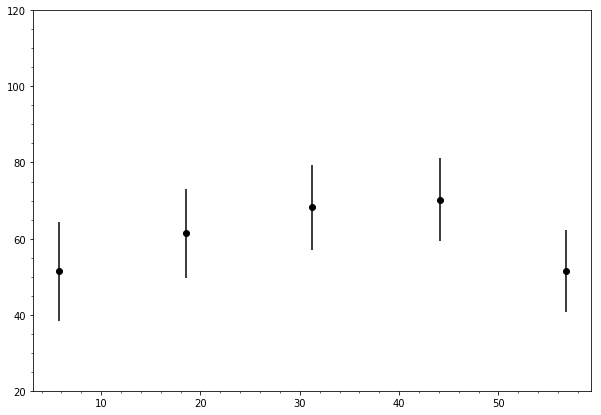

In [46]:
e3 = pd.read_table('1315/daily/dataTables/2M1315de3-LLRR.dat')
e3 = binning(e3,500)

plt.figure(figsize=(10,7))
plt.errorbar(e3['dtmin'],e3['re'],yerr=e3['ure'],color='black',linestyle='none',marker='o')
plt.ylim(20,120)
plt.minorticks_on()
plt.show()

In [47]:
ll = pd.read_table('1315/daily/dataTables/2M1315de3-LL.dat')
rr = pd.read_table('1315/daily/dataTables/2M1315de3-RR.dat')

ll = binning(ll,150)
rr = binning(rr,150)


stI = (rr['re']+ll['re'])*.5
stV = (rr['re']-ll['re'])*.5
stErr = np.sqrt(rr['ure']**2+ll['ure']**2)*.5

frac = stV/stI
fracErr = np.abs(frac)*np.sqrt((stErr/stI)**2+(stErr/stV)**2)
time = rr['dtmin']

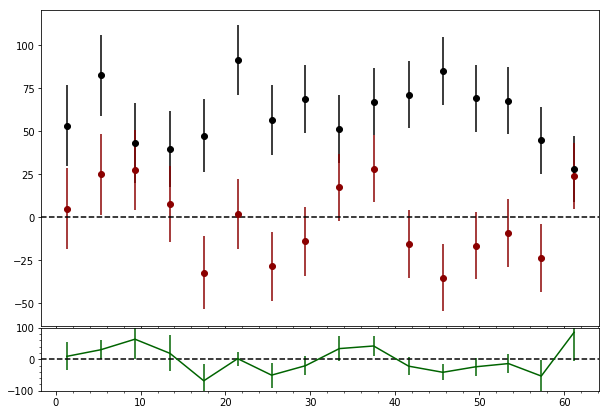

In [48]:
fig,ax=plt.subplots(nrows=2,ncols=1,sharex=True,gridspec_kw= {'hspace':.01,'height_ratios':[5,1]},figsize=(10,7))
ax[0].errorbar(time,stI,yerr=stErr,color='black',linestyle='none',marker='o')
ax[0].errorbar(time,stV,yerr=stErr,color='darkred',linestyle='none',marker='o')
ax[0].axhline(y=0,color='black',linestyle='dashed')
ax[1].errorbar(time,100*frac,yerr=100*fracErr,color='darkgreen')
ax[1].axhline(y=0,color='black',linestyle='dashed')
ax[1].set_ylim(-100,100)

plt.minorticks_on()
plt.show()